# Assignment 7 (Week 7)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
```

## Name: Enter Your Name

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [1]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
%load_ext nb_black

<IPython.core.display.Javascript object>

> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

In [2]:
# Read data
file_path = "salary.csv"
df = pd.read_csv(file_path)

# Copy data
data = df.copy()

# View first five rows
data.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


<IPython.core.display.Javascript object>

In [3]:
# Checking the variables obj type

data.dtypes

Age                int64
Workclass         object
Final_weight       int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Country           object
Salary            object
dtype: object

<IPython.core.display.Javascript object>

In [4]:
# Checking for null values

data.isna().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

<IPython.core.display.Javascript object>

In [5]:
# Statistical distribution of the numeric variables

data.describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<IPython.core.display.Javascript object>

In [6]:
# Distribution of the categorical variables

data.describe(include=["O"])


,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Country,Salary
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


<IPython.core.display.Javascript object>

### EDA

In [7]:
# Separate numeric and categorical features
num_data = data.select_dtypes(exclude="O")
cat_data = data.select_dtypes(include="O")

<IPython.core.display.Javascript object>

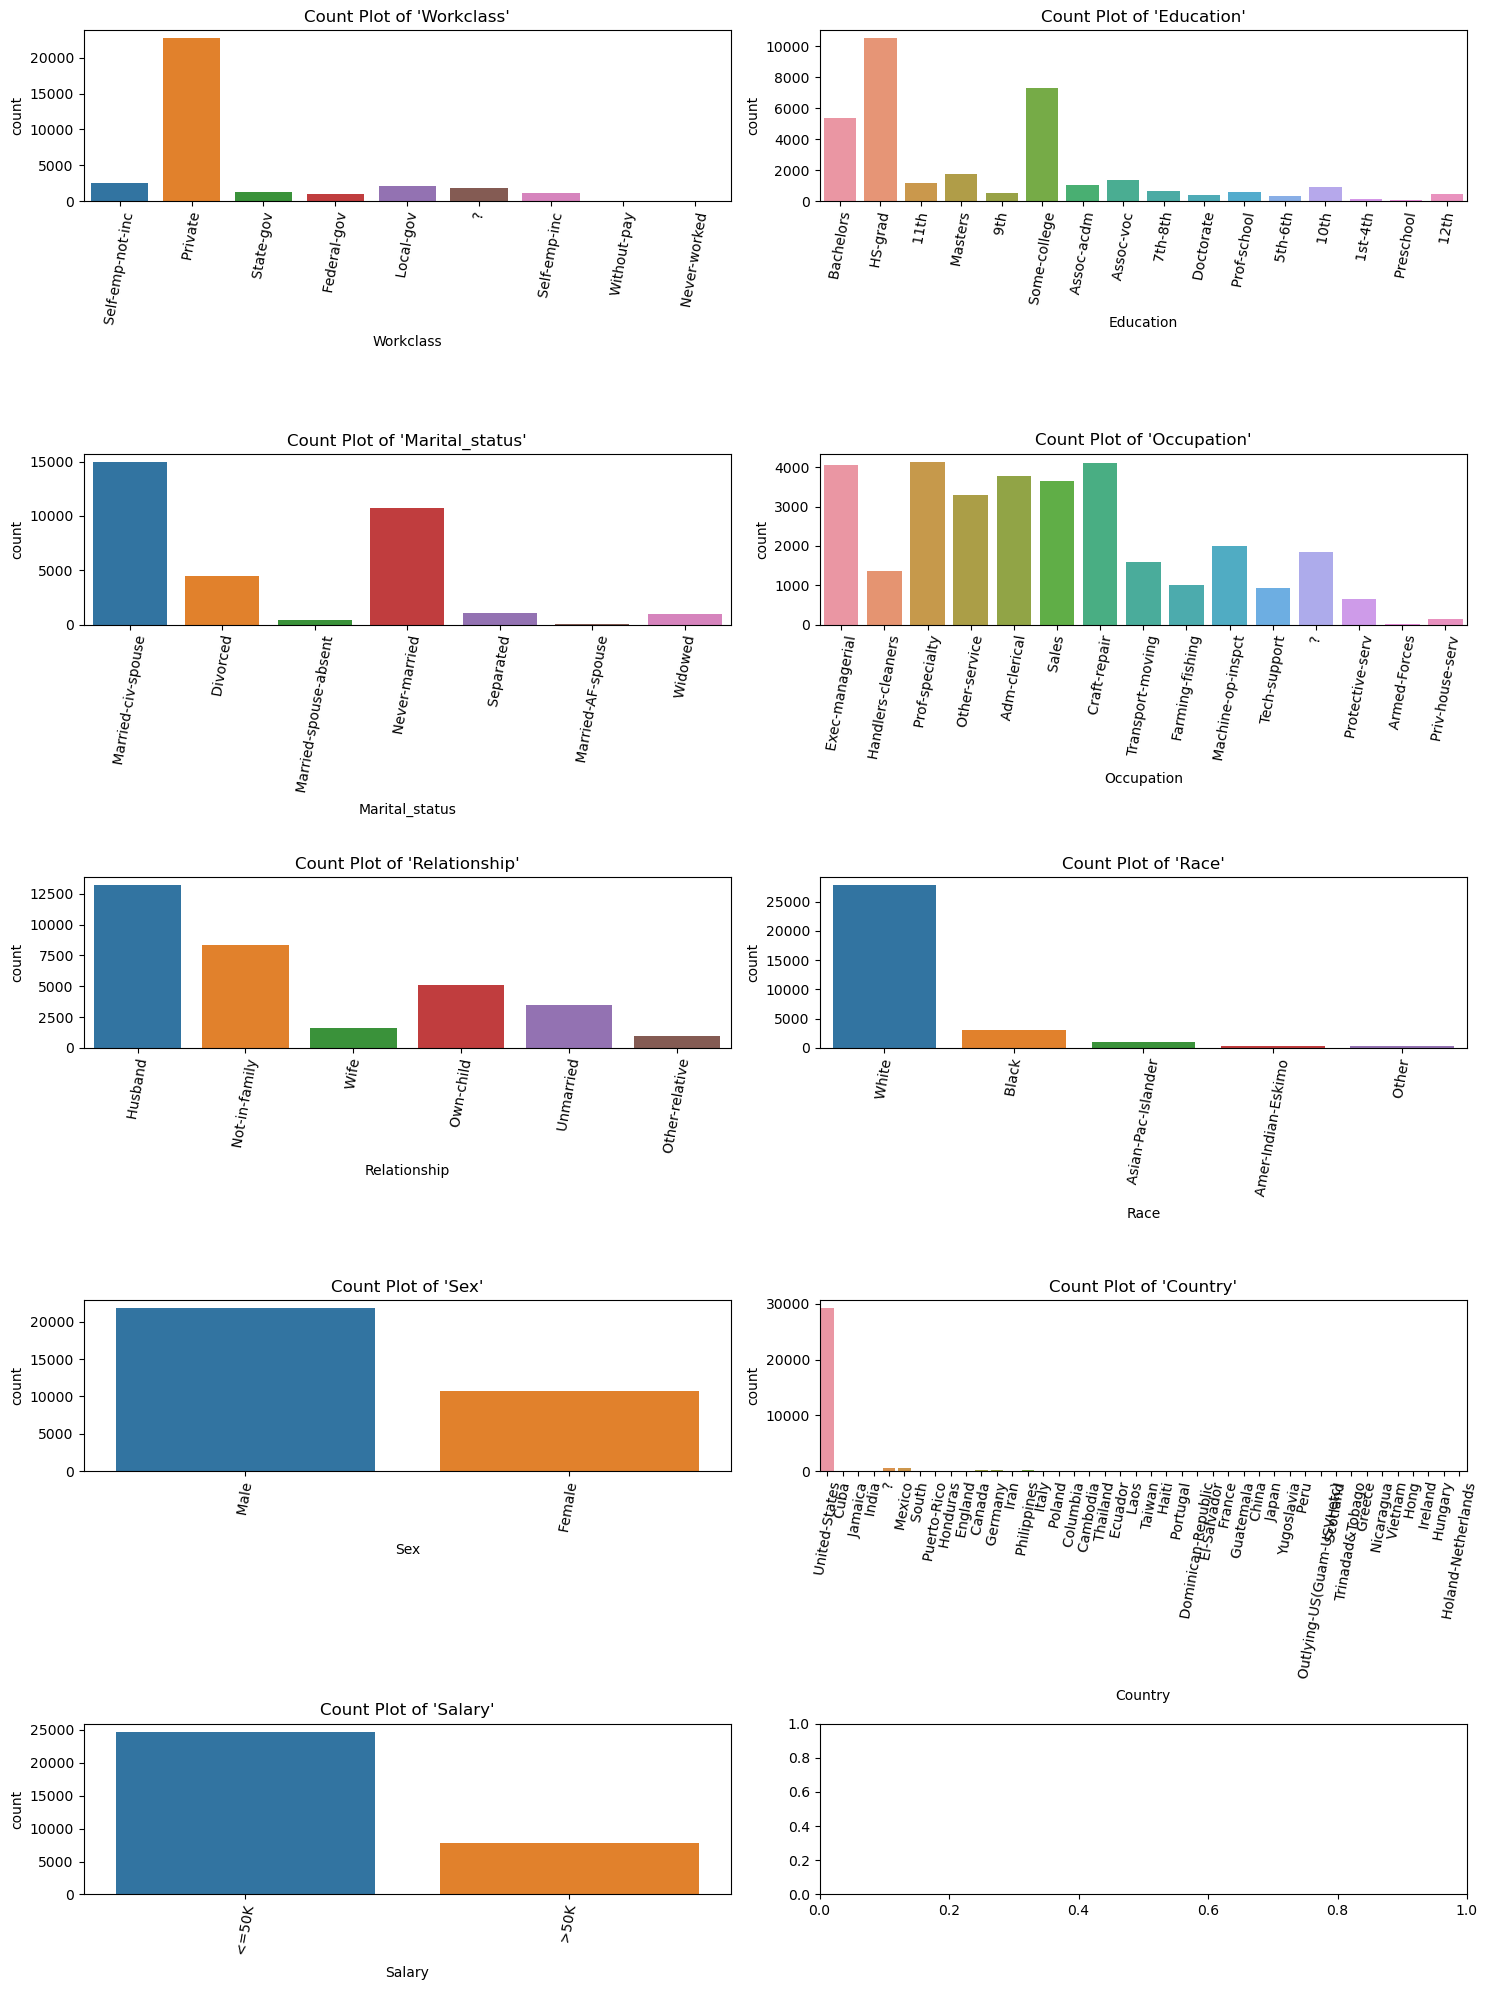

<IPython.core.display.Javascript object>

In [8]:
# Count plot


def plot_(
    data: pd.DataFrame,
    features: list[str],
    rows_num: int,
    cols_num: int,
    figsize: tuple,
) -> "Plot":
    """This returns a count plot of all the categorical variables"""
    fig, axs = plt.subplots(rows_num, cols_num, figsize=figsize)

    for idx, feat in enumerate(data.columns):
        if rows_num > 1:
            ax = axs[(idx // cols_num), (idx % cols_num)]
        else:
            ax = axs[idx]

        sns.countplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Count Plot of {feat!r}")

        labels = sorted(data[feat].value_counts().index)
        ax.tick_params(axis="x", rotation=80)

    fig.tight_layout()
    plt.show()


# Display plot
plot_(
    data=cat_data, features=cat_data.columns, rows_num=5, cols_num=2, figsize=(15, 20)
)

### Observation

* Most feature have labels that rarely occurred

* **Workclass**, **Country** and **Occupation** have an unusual label `?`


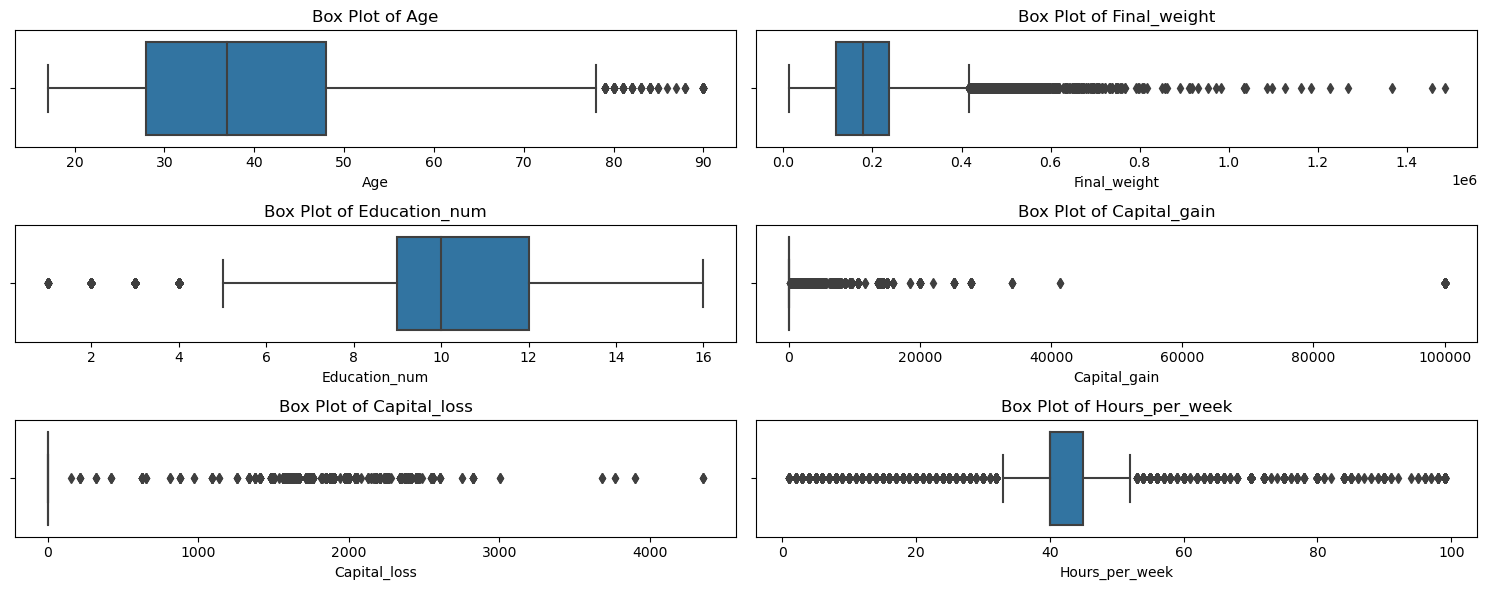

<IPython.core.display.Javascript object>

In [9]:
# Box Plot

rows_num, cols_num = 3, 2

fig, axs = plt.subplots(rows_num, cols_num, figsize=(15, 6))

for idx, var in enumerate(num_data.columns):
    if rows_num > 1:
        ax = axs[(idx // cols_num), (idx % cols_num)]
    else:
        ax = axs[idx]

    sns.boxplot(data=data, x=var, ax=ax)
    ax.set_title(f"Box Plot of {var}")

fig.tight_layout()
plt.show()

## Data Cleaning

In [10]:
# Removing white spaces from each the categorical labels
for var in cat_data.columns:
    data[var] = cat_data[var].apply(lambda x: x.strip())

<IPython.core.display.Javascript object>

In [11]:
# Verify

data["Workclass"].unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

<IPython.core.display.Javascript object>

In [12]:
# Replace `?` with the most occurred value
feat = ["Workclass", "Occupation", "Country"]

for x in data[feat]:
    most_occ = data[x].mode().values[0]
    data[x].replace("?", most_occ, inplace=True)

<IPython.core.display.Javascript object>

In [13]:
# Verify

data["Country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

<IPython.core.display.Javascript object>

In [14]:
# Drop Education_num: it's the same as Education
data.drop(columns="Education_num", inplace=True)

<IPython.core.display.Javascript object>

In [15]:
class Workclass:
    """This class contain new labels for Workclass"""

    PRIVATE = "Private"
    SELFNOTINC = "Self-emp-not-inc"
    LOCAL = "Local-gov"
    STATE = "State-gov"
    SELFINC = "Self-emp-inc"
    FEDERAL = "Federal-gov"
    REPLACE = "Others"


def labels(wk_field: str) -> str:
    """This returns new labels for Workclass"""
    if wk_field == "Private":
        result = Workclass.PRIVATE
    elif wk_field == "Self-emp-not-inc":
        result = Workclass.SELFNOTINC
    elif wk_field == "Local-gov":
        result = Workclass.LOCAL
    elif wk_field == "State-gov":
        result = Workclass.STATE
    elif wk_field == "Self-emp-inc":
        result = Workclass.SELFINC
    elif wk_field == "Federal-gov":
        result = Workclass.FEDERAL
    else:
        result = Workclass.REPLACE
    return result


# Assigning a new label to our data applying the above function
data["Workclass"] = data["Workclass"].apply(labels)

<IPython.core.display.Javascript object>

In [16]:
class Education:
    """This class contain new labels for Education"""

    GRAD = "HS-grad"
    COLLEGE = "Some-college"
    BSC = "Bachelors"
    MSC = "Masters"
    ASSOCV = "Assoc-voc"
    ASSOCAC = "Assoc-acdm"
    DOCTORATE = "Doctorate"
    REPLACE = "Others"


def labels(edu: str) -> str:
    """This returns new labels for Education"""
    if edu == "HS-grad":
        result = Education.GRAD
    elif edu == "Some-college":
        result = Education.COLLEGE
    elif edu == "Bachelors":
        result = Education.BSC
    elif edu == "Masters":
        result = Education.MSC
    elif edu == "Assoc-voc":
        result = Education.ASSOCV
    elif edu == "Assoc-acdm":
        result = Education.ASSOCAC
    elif edu == "Doctorate":
        result = Education.DOCTORATE
    else:  # (Other labels)
        result = Education.REPLACE
    return result

<IPython.core.display.Javascript object>

In [17]:
# Assigning a new label to our data applying the above function
data["Education"] = data["Education"].apply(labels)

<IPython.core.display.Javascript object>

In [18]:
class Country:
    """This class contain new labels for Country"""

    US = "United-States"
    REPLACE = "Others"


def labels(country: str) -> str:
    """This returns new labels for Country"""
    if country == "United-States":
        result = Country.US
    else:
        result = Country.REPLACE
    return result


# Assigning a new label to our data applying the above function
data["Country"] = data["Country"].apply(labels)

<IPython.core.display.Javascript object>

In [19]:
class MaritalStatus:
    """This class contain new labels for Maritalstatus"""

    MARRIED = "Married-civ-spouse"
    SINGLE = "Never-married"
    DIVORCED = "Divorced"
    SEP = "Separated"
    WIDOW = "Widowed"
    REPLACE = "Others"


def labels(mar_stat: str) -> str:
    """This returns new labels for Marital status"""
    if mar_stat == "Married-civ-spouse":
        result = MaritalStatus.MARRIED
    elif mar_stat == "Never-married":
        result = MaritalStatus.SINGLE
    elif mar_stat == "Divorced":
        result = MaritalStatus.DIVORCED
    elif mar_stat == "Separated":
        result = MaritalStatus.SEP
    elif mar_stat == "Widowed":
        result = MaritalStatus.WIDOW
    else:
        result = MaritalStatus.REPLACE
    return result


# Assigning a new label to our data applying the above function
data["Marital_status"] = data["Marital_status"].apply(labels)

<IPython.core.display.Javascript object>

In [20]:
class Occupation:
    """This class contain new labels for Occupation"""

    PROF = "Prof-specialty"
    CRAFT = "Craft-repair"
    EXEC = "Exec-managerial"
    ADM = "Adm-clerical"
    SALES = "Sales"
    SERVICE = "Other-service"
    MACH = "Machine-op-inspct"
    TRANS = "Transport-moving"
    CLEAN = "Handlers-cleaners"
    FARM = "Farming-fishing"
    TECH = "Tech-support"
    PROTECT = "Protective-serv"
    REPLACE = "Others"


def labels(occ: str) -> str:
    """This returns new labels for Workclass"""

    if occ == "Prof-specialty":
        result = Occupation.PROF
    elif occ == "Craft-repair":
        result = Occupation.CRAFT
    elif occ == "Exec-managerial":
        result = Occupation.EXEC
    elif occ == "Adm-clerical":
        result = Occupation.ADM
    elif occ == "Sales":
        result = Occupation.SALES
    elif occ == "Other-service":
        result = Occupation.SERVICE
    elif occ == "Machine-op-inspct":
        result = Occupation.MACH
    elif occ == "Transport-moving":
        result = Occupation.TRANS
    elif occ == "Handlers-cleaners":
        result = Occupation.CLEAN
    elif occ == "Farming-fishing":
        result = Occupation.FARM
    elif occ == "Tech-support":
        result = Occupation.TECH
    elif occ == "Protective-serv":
        result = Occupation.PROTECT
    else:  # (Widow, Alone, Absurd, YOLO)
        result = Occupation.REPLACE
    return result


# Assigning a new label to our data applying the above function
data["Occupation"] = data["Occupation"].apply(labels)

<IPython.core.display.Javascript object>

## Feature Selection

In [21]:
RANDOMSTATE = 123
TESTSIZE = 0.2
TARGET = "Salary"

from sklearn.model_selection import train_test_split

# Independent variable (matrix)
X = data.drop(columns=TARGET)

# Target variable (Vector)
y = data[TARGET]

# Split X & y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TESTSIZE, random_state=RANDOMSTATE)

#Shape: Train, Test
print(f"'Independent feature':{X_train.shape}, {X_test.shape}, \n'Target features:' {y_train.shape}, {y_test.shape}")



'Independent feature':(26048, 13), (6512, 13), 
'Target features:' (26048,), (6512,)


<IPython.core.display.Javascript object>

## Feature Engineering

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# VTS: Variables to scale
VTS = [
    "Age",
    "Final_weight",
    "Capital_gain",
    "Capital_loss",
    "Hours_per_week",
]

# VTE: Variables to encode
VTE = [
    "Workclass",
    "Education",
    "Marital_status",
    "Occupation",
    "Relationship",
    "Race",
    "Sex",
    "Country",
]

<IPython.core.display.Javascript object>

In [23]:
# One Hot Encode
ohe = OneHotEncoder(dtype=int, handle_unknown="ignore")

# Scale
scaler = MinMaxScaler()


col_trans = ColumnTransformer(
    transformers=[("ohe", ohe, VTE), ("scaler", scaler, VTS)], remainder="passthrough"
)

col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(dtype=<class 'int'>,
                                               handle_unknown='ignore'),
                                 ['Workclass', 'Education', 'Marital_status',
                                  'Occupation', 'Relationship', 'Race', 'Sex',
                                  'Country']),
                                ('scaler', MinMaxScaler(),
                                 ['Age', 'Final_weight', 'Capital_gain',
                                  'Capital_loss', 'Hours_per_week'])])

<IPython.core.display.Javascript object>

In [24]:
tr = col_trans.fit_transform(X_train)
tr = tr.toarray()

<IPython.core.display.Javascript object>

In [25]:
df_t = pd.DataFrame(tr, columns=col_trans.get_feature_names_out())
df_t.head()

,ohe__Workclass_Federal-gov,ohe__Workclass_Local-gov,ohe__Workclass_Others,ohe__Workclass_Private,ohe__Workclass_Self-emp-inc,ohe__Workclass_Self-emp-not-inc,ohe__Workclass_State-gov,ohe__Education_Assoc-acdm,ohe__Education_Assoc-voc,ohe__Education_Bachelors,ohe__Education_Doctorate,ohe__Education_HS-grad,ohe__Education_Masters,ohe__Education_Others,ohe__Education_Some-college,ohe__Marital_status_Divorced,ohe__Marital_status_Married-civ-spouse,ohe__Marital_status_Never-married,ohe__Marital_status_Others,ohe__Marital_status_Separated,ohe__Marital_status_Widowed,ohe__Occupation_Adm-clerical,ohe__Occupation_Craft-repair,ohe__Occupation_Exec-managerial,ohe__Occupation_Farming-fishing,ohe__Occupation_Handlers-cleaners,ohe__Occupation_Machine-op-inspct,ohe__Occupation_Other-service,ohe__Occupation_Others,ohe__Occupation_Prof-specialty,ohe__Occupation_Protective-serv,ohe__Occupation_Sales,ohe__Occupation_Tech-support,ohe__Occupation_Transport-moving,ohe__Relationship_Husband,ohe__Relationship_Not-in-family,ohe__Relationship_Other-relative,ohe__Relationship_Own-child,ohe__Relationship_Unmarried,ohe__Relationship_Wife,ohe__Race_Amer-Indian-Eskimo,ohe__Race_Asian-Pac-Islander,ohe__Race_Black,ohe__Race_Other,ohe__Race_White,ohe__Sex_Female,ohe__Sex_Male,ohe__Country_Others,ohe__Country_United-States,scaler__Age,scaler__Final_weight,scaler__Capital_gain,scaler__Capital_loss,scaler__Hours_per_week
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.041096,0.106341,0.0,0.0,0.193878
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.068493,0.175324,0.0,0.0,0.397959
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.260274,0.267151,0.0,0.0,0.346939
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.068493,0.026386,0.0,0.0,0.602041
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.082192,0.026262,0.0,0.0,0.397959


<IPython.core.display.Javascript object>

## Model Building

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Initialize
logit = LogisticRegression(random_state=RANDOMSTATE, max_iter=180)

# Pipeline
pipe_logit = Pipeline(
    steps=[
        # ===== Column Transformer =====
        ("col_transformer", col_trans),
        # ===== log Model =====
        ("logit", logit),
    ]
)

pipe_logit

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Workclass', 'Education',
                                                   'Marital_status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex', 'Country']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['Age', 'Final_weight',
                                                   'Capital_gain',
                                                   'Capital_loss',
                                                   'Hours_per_week'])])),
                ('logit', LogisticRegression(max_iter=180, random_state=123))])

<IPython.core.display.Javascript object>

In [27]:
# Fit
pipe_logit.fit(X_train, y_train)

# Prediction
y_pred = pipe_logit.predict(X_test)

# Probability
y_prob = pipe_logit.predict_proba(X_test)[:, 1]


<IPython.core.display.Javascript object>

## Model Evaluation

In [28]:
# Accuracy

np.mean(y_test == y_pred)

0.851044226044226

<IPython.core.display.Javascript object>

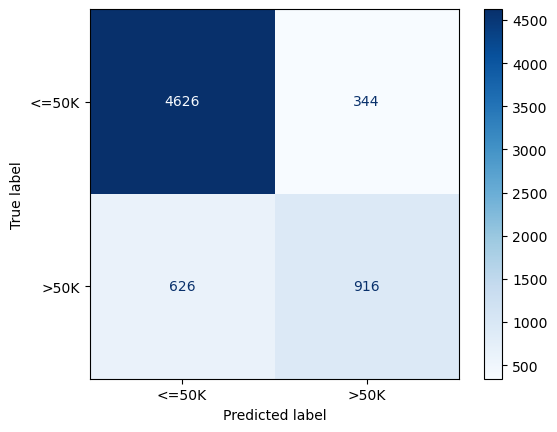

<IPython.core.display.Javascript object>

In [29]:
# Confusion Matrix

labels = ["<=50K", ">50K"]

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

plot_ = metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
plot_.plot(cmap=plt.cm.Blues)
plt.show()

In [30]:
# Classification report

clf_report = metrics.classification_report(y_test, y_pred)

print(clf_report)

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      4970
        >50K       0.73      0.59      0.65      1542

    accuracy                           0.85      6512
   macro avg       0.80      0.76      0.78      6512
weighted avg       0.84      0.85      0.85      6512



<IPython.core.display.Javascript object>

In [31]:
# AUC

auc_score = metrics.roc_auc_score(y_true=y_test, y_score=y_prob)
auc_score

0.9007741650943273

<IPython.core.display.Javascript object>

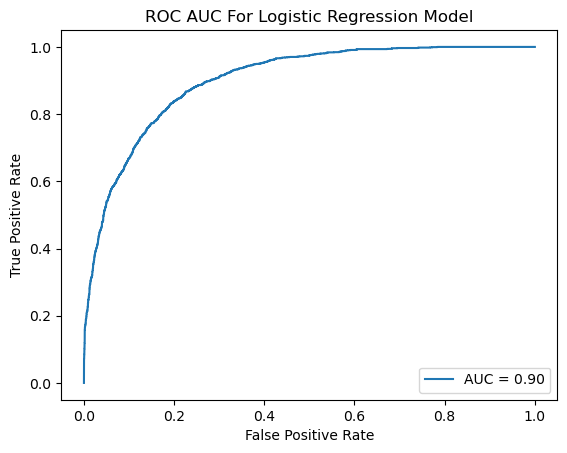

<IPython.core.display.Javascript object>

In [32]:
# AUC curve

fpr, tpr, thresholds = metrics.roc_curve(
    y_true=y_test, y_score=y_prob, pos_label=">50K"
)

auc_score = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=auc_score, estimator_name=None
)
display.plot()
plt.title("ROC AUC For Logistic Regression Model")

plt.show()

In [33]:
fpr, tpr, thresholds = metrics.roc_curve(
    y_true=y_test, y_score=y_prob, pos_label=">50K"
)

auc_score = metrics.auc(fpr, tpr)
auc_score

0.9007741650943273

<IPython.core.display.Javascript object>

### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Initialize
logit = LogisticRegression(random_state=RANDOMSTATE)

# Pipeline
pipe_dec_tree = Pipeline(
    steps=[
        # Column Transformer
        ("col_transformer", col_trans),
        # log Model
        ("logit", DecisionTreeClassifier(random_state=RANDOMSTATE)),
    ]
)

pipe_dec_tree

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Workclass', 'Education',
                                                   'Marital_status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex', 'Country']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['Age', 'Final_weight',
                                                   'Capital_gain',
                                                   'Capital_loss',
                                                   'Hours_per_week'])])),
                ('logit', DecisionTreeClassifier(random_state=123))])

<IPython.core.display.Javascript object>

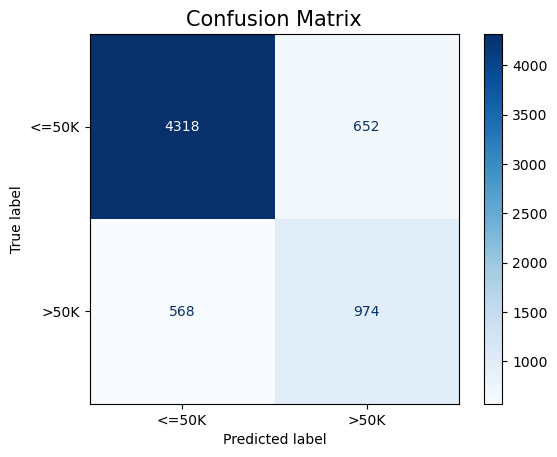

<IPython.core.display.Javascript object>

In [35]:
# Fit
pipe_dec_tree.fit(X_train, y_train)

# Predict
y_pred_2 = pipe_dec_tree.predict(X_test)

# Probability
y_proba_D = pipe_dec_tree.predict_proba(X_test)[:, 1]

# Confusion matix
conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_2)

disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, display_labels=labels
)
# Show confusion matix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix", size=15)
plt.show()

In [36]:
# Classification Report
clf_report = metrics.classification_report(y_true=y_test, y_pred=y_pred_2)

print(clf_report)

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      4970
        >50K       0.60      0.63      0.61      1542

    accuracy                           0.81      6512
   macro avg       0.74      0.75      0.75      6512
weighted avg       0.82      0.81      0.81      6512



<IPython.core.display.Javascript object>

In [37]:
# AUC

auc_score_D = metrics.roc_auc_score(y_true=y_test, y_score=y_proba_D)
auc_score_D

0.7502300443386649

<IPython.core.display.Javascript object>

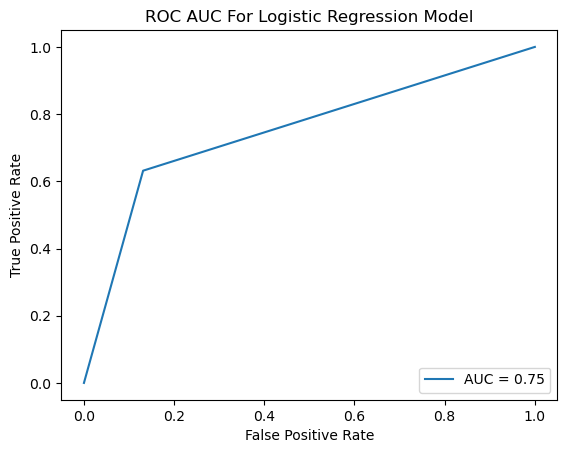

<IPython.core.display.Javascript object>

In [38]:
# AUC curve
fpr, tpr, thresholds = metrics.roc_curve(
    y_true=y_test, y_score=y_proba_D, pos_label=">50K"
)

auc_score_D = metrics.auc(fpr, tpr)
auc_score_D

display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=auc_score_D, estimator_name=None
)
display.plot()
plt.title("ROC AUC For Logistic Regression Model")

plt.show()

### Check Predictions

In [39]:
# Observation 31806

data.iloc[31806]

Age                               51
Workclass           Self-emp-not-inc
Final_weight                  170086
Education                  Bachelors
Marital_status    Married-civ-spouse
Occupation              Tech-support
Relationship                 Husband
Race                           White
Sex                             Male
Capital_gain                       0
Capital_loss                       0
Hours_per_week                    45
Country                United-States
Salary                          >50K
Name: 31806, dtype: object

<IPython.core.display.Javascript object>

In [40]:
unseen_data = {
    "Age": 51,
    "Workclass": "Self-emp-not-inc",
    "Final_weight": 170086,
    "Education": "Bachelors",
    "Education_num": 13,
    "Marital_status": "Married-civ-spouse",
    "Occupation": "Tech-support",
    "Relationship": "Husband",
    "Race": "Exec-White",
    "Sex": "Male",
    "Capital_gain": 0,
    "Capital_loss": 0,
    "Hours_per_week": 45,
    "Country": "United-States",
}

df___ = pd.DataFrame(data=unseen_data, index=[0])
df___

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country
0,51,Self-emp-not-inc,170086,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Exec-White,Male,0,0,45,United-States


<IPython.core.display.Javascript object>

In [41]:
# Logit regression
result = pipe_logit.predict(df___)[0]
result

'>50K'

<IPython.core.display.Javascript object>

In [42]:
# Decision tree
result = pipe_dec_tree.predict(df___)[0]
result

'>50K'

<IPython.core.display.Javascript object>

In [43]:
# Observation 1

data.iloc[0]

Age                               50
Workclass           Self-emp-not-inc
Final_weight                   83311
Education                  Bachelors
Marital_status    Married-civ-spouse
Occupation           Exec-managerial
Relationship                 Husband
Race                           White
Sex                             Male
Capital_gain                       0
Capital_loss                       0
Hours_per_week                    13
Country                United-States
Salary                         <=50K
Name: 0, dtype: object

<IPython.core.display.Javascript object>

In [44]:
unseen_data = {
    "Age": 50,
    "Workclass": "Self-emp-not-inc",
    "Final_weight": 83311,
    "Education": "Bachelors",
    "Education_num": 13,
    "Marital_status": "Married-civ-spouse",
    "Occupation": "Exec-managerial",
    "Relationship": "Husband",
    "Race": "Exec-White",
    "Sex": "Male",
    "Capital_gain": 0,
    "Capital_loss": 0,
    "Hours_per_week": 13,
    "Country": "United-States",
}

df_ = pd.DataFrame(data=unseen_data, index=[0])
df_

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Exec-White,Male,0,0,13,United-States


<IPython.core.display.Javascript object>

In [45]:
# Logit regression
result = pipe_logit.predict(df_)[0]
result

'<=50K'

<IPython.core.display.Javascript object>

In [46]:
# Decision tree
result = pipe_dec_tree.predict(df_)[0]
result

'<=50K'

<IPython.core.display.Javascript object>

In [47]:
# Observation 29717

data.iloc[29717]

Age                               33
Workclass           Self-emp-not-inc
Final_weight                  170979
Education                     Others
Marital_status    Married-civ-spouse
Occupation            Prof-specialty
Relationship                 Husband
Race                           White
Sex                             Male
Capital_gain                       0
Capital_loss                    1887
Hours_per_week                    40
Country                United-States
Salary                          >50K
Name: 29717, dtype: object

<IPython.core.display.Javascript object>

In [48]:
unseen_data = {
    "Age": 33,
    "Workclass": "Self-emp-not-inc",
    "Final_weight": 170979,
    "Education": "Prof-school",
    "Education_num": 15,
    "Marital_status": "Married-civ-spouse",
    "Occupation": "Prof-specialty",
    "Relationship": "Husband",
    "Race": "White",
    "Sex": "Male",
    "Capital_gain": 0,
    "Capital_loss": 1887,
    "Hours_per_week": 40,
    "Country": "United-States",
}

df__ = pd.DataFrame(data=unseen_data, index=[0])
df__

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country
0,33,Self-emp-not-inc,170979,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1887,40,United-States


<IPython.core.display.Javascript object>

In [49]:
# Logit regression
result = pipe_logit.predict(df__)[0]
result

'>50K'

<IPython.core.display.Javascript object>

In [50]:
# Decision tree
result = pipe_dec_tree.predict(df__)[0]
result

'>50K'

<IPython.core.display.Javascript object>